# Importing the Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, silhouette_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import AdamW
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from matplotlib import rcParams
from PIL import Image
from sklearn.svm import SVC

In [2]:
# Download required nltk data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
file_path = 'bbc_text_cls.csv'
data = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sleek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis

In [3]:
data.tail(25)

,text,labels
2200,California sets fines for spyware\n\nThe maker...,tech
2201,Mobile TV tipped as one to watch\n\nScandinavi...,tech
2202,Apple laptop is 'greatest gadget'\n\nThe Apple...,tech
2203,Sun offers processing by the hour\n\nSun Micro...,tech
2204,Kenyan school turns to handhelds\n\nAt the Mbi...,tech
2205,Tough rules for ringtone sellers\n\nFirms that...,tech
2206,Mobile music challenges 'iPod age'\n\nNokia an...,tech
2207,China 'ripe' for media explosion\n\nAsia is se...,tech
2208,Beckham virus spotted on the net\n\nVirus writ...,tech
2209,Video phones act as dating tools\n\nTechnologi...,tech


In [4]:
data.shape

(2225, 2)

In [5]:
data.isna().sum()

text      0
labels    0
dtype: int64

### Class Label Distribution

C:\Users\sleek\AppData\Local\Temp\ipykernel_12340\1737446519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

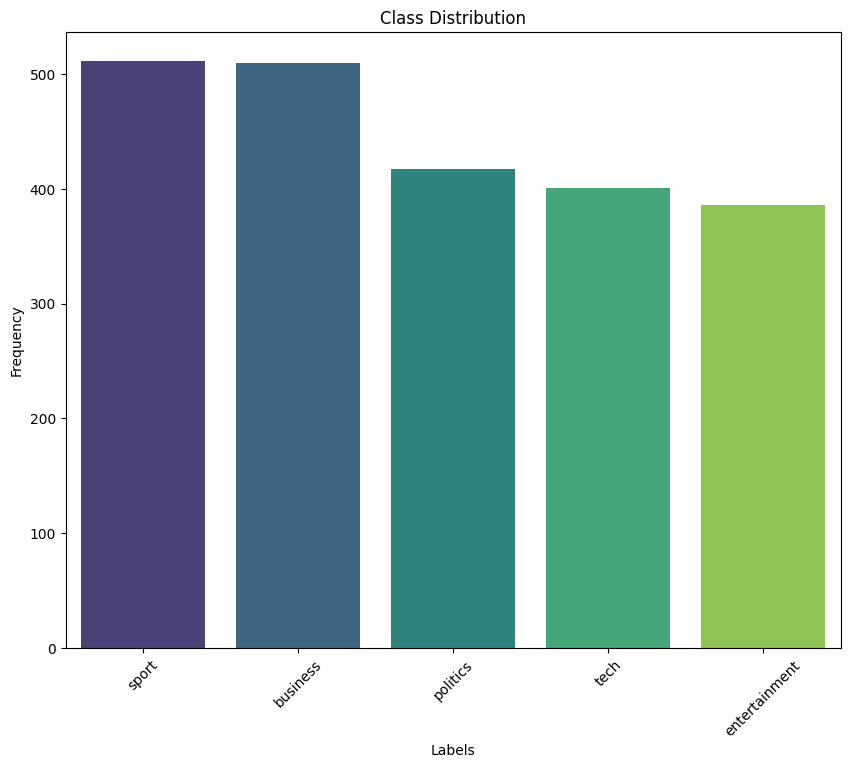

In [6]:
# Exploratory Data Analysis (EDA)
# Visualize class distribution
class_distribution = data['labels'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("Labels Distribution.jpg")
plt.show()

### Text Length Distribution

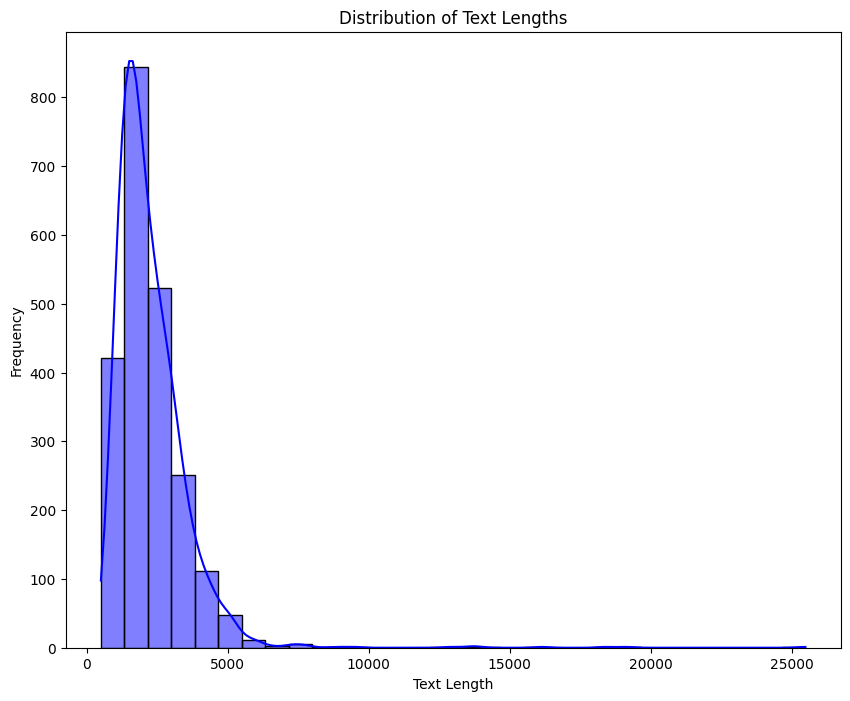

In [7]:
# Add a column for text length
data['text_length'] = data['text'].apply(len)

# Plot 2: Histogram of text lengths
plt.figure(figsize=(10, 8))
sns.histplot(data['text_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('Text Length Distribution.jpg')
plt.show()

### Boxplot of text length by Label

C:\Users\sleek\AppData\Local\Temp\ipykernel_12340\1013410945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='text_length', data=data, palette='Set2')
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\

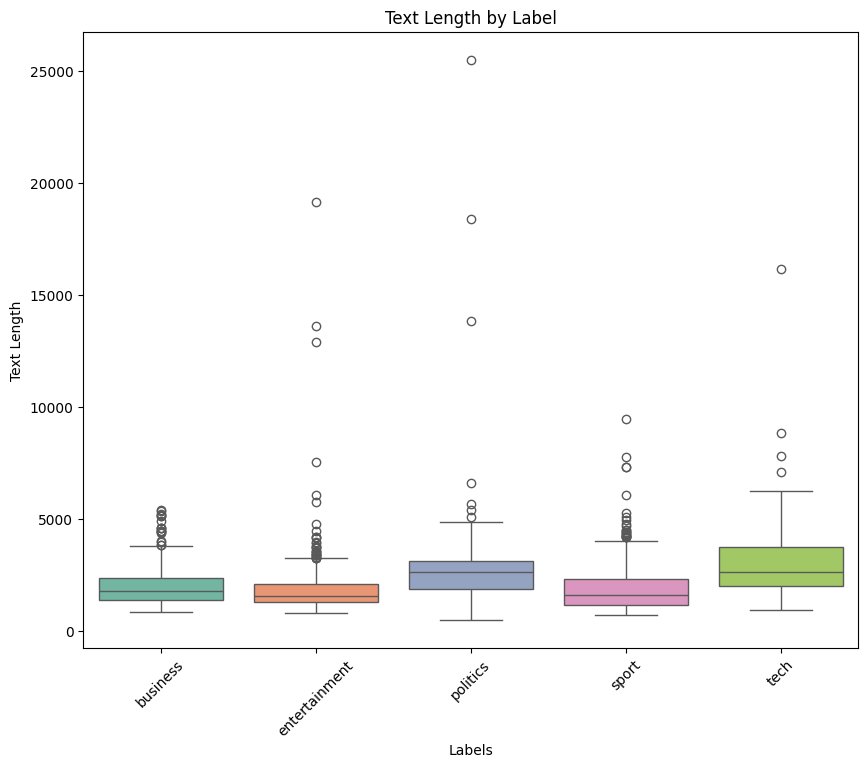

In [8]:
# Plot 3: Boxplot of text length by label
plt.figure(figsize=(10, 8))
sns.boxplot(x='labels', y='text_length', data=data, palette='Set2')
plt.title('Text Length by Label')
plt.xlabel('Labels')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.savefig('Boxplot of text length.jpg')
plt.show()

# WordCloud for each of the 5 news categories

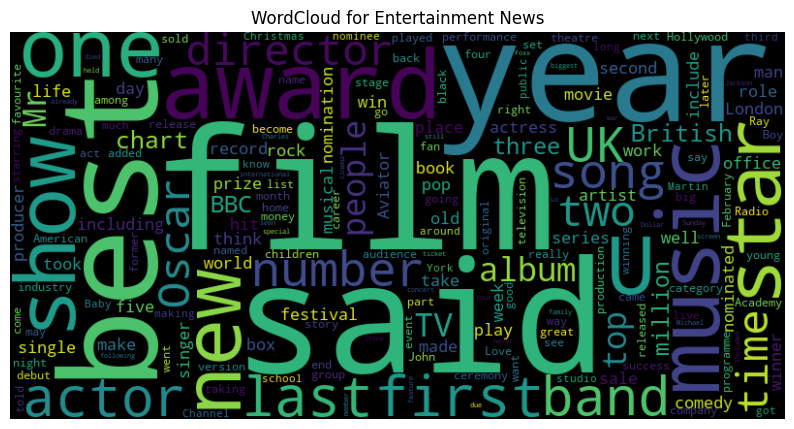

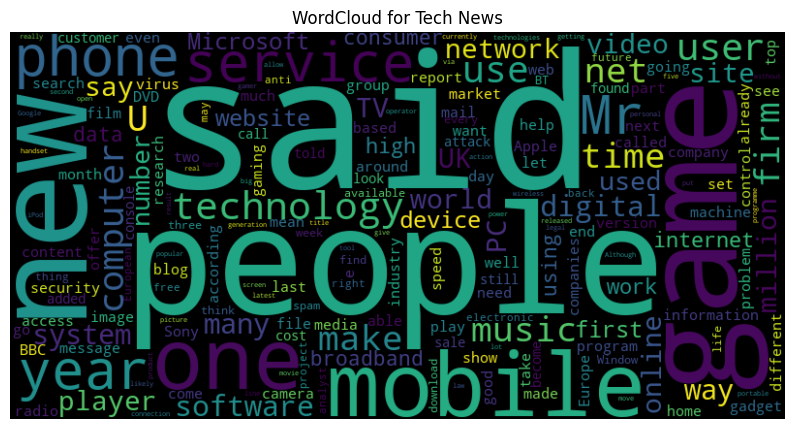

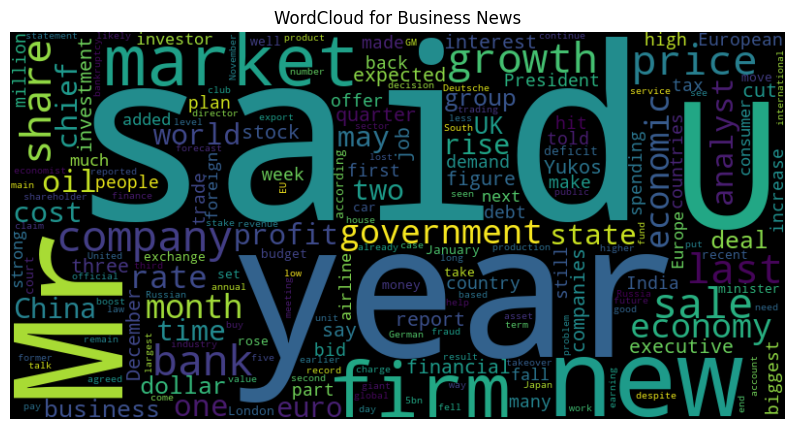

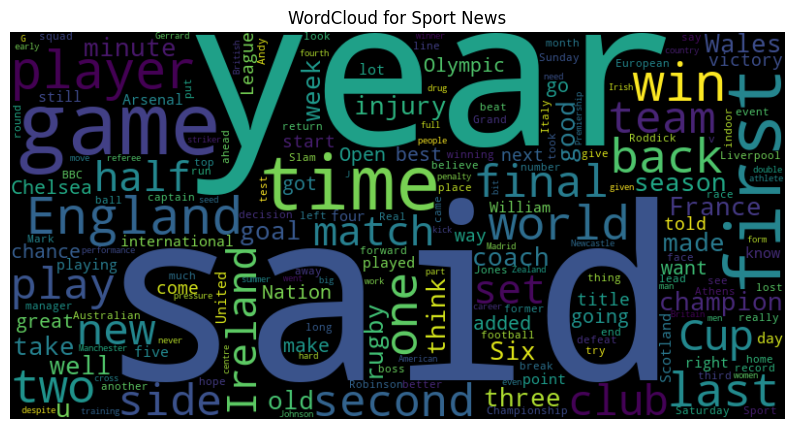

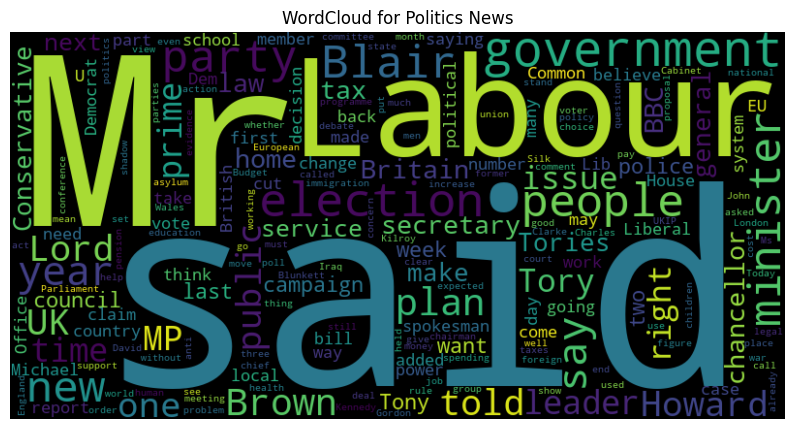

In [11]:
def preprocess_text(text):
    """
    Remove stopwords from the given text.
    
    Parameters:
        text (str): The input text.
    
    Returns:
        str: The preprocessed text with stopwords removed.
    """
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def generate_and_save_wordcloud(data, categories, output_folder="output/"):
    """
    Generate and save WordClouds for given categories of text.

    Parameters:
        data (DataFrame): The DataFrame containing text and labels.
        categories (list): List of categories to generate WordClouds for.
        output_folder (str): Folder where WordCloud images will be saved.
    """
    for category in categories:
        # Extract and preprocess text for the given category
        category_text = ' '.join(
            preprocess_text(text) for text in data[data['labels'] == category]["text"]
        )
        
        # Generate the WordCloud
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='black', 
            collocations=False
        ).generate(category_text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud for {category.capitalize()} News')
        
        # Save the WordCloud
        filename = f"{category.capitalize()}_News_WordCloud.jpg"
        plt.savefig(filename, bbox_inches='tight')
        plt.show()

# Example usage:
categories = ["entertainment", "tech", "business", "sport", "politics"]
generate_and_save_wordcloud(data, categories)


In [13]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['encoded_labels'] = label_encoder.fit_transform(data['labels'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['encoded_labels'], test_size=0.2, stratify=data['encoded_labels'], random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print some stats for confirmation
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("TF-IDF feature matrix shape (train):", X_train_tfidf.shape)
print("TF-IDF feature matrix shape (test):", X_test_tfidf.shape)

Training set size: (1780,)
Testing set size: (445,)
TF-IDF feature matrix shape (train): (1780, 5000)
TF-IDF feature matrix shape (test): (445, 5000)


# Naive Bayes Algorithm

Naive Bayes Performance:
Accuracy: 0.9887640449438202
F1 Score: 0.9887750323097229
ROC-AUC Score: 0.999052655888627
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       1.00      1.00      1.00        77
           2       0.99      0.99      0.99        84
           3       1.00      1.00      1.00       102
           4       0.96      0.99      0.98        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



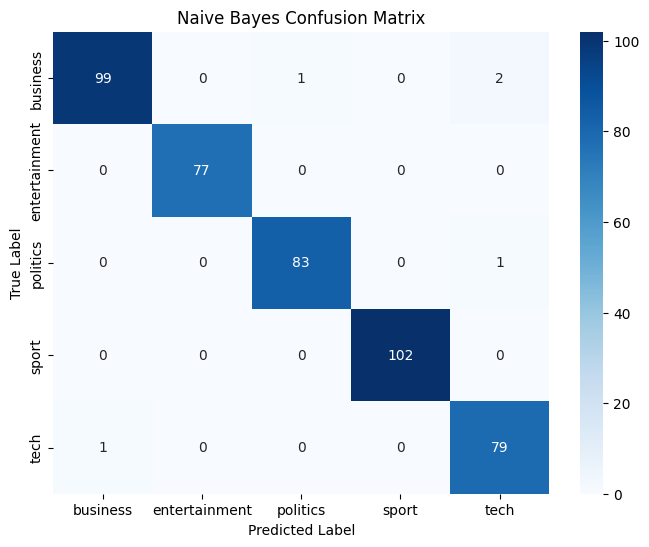

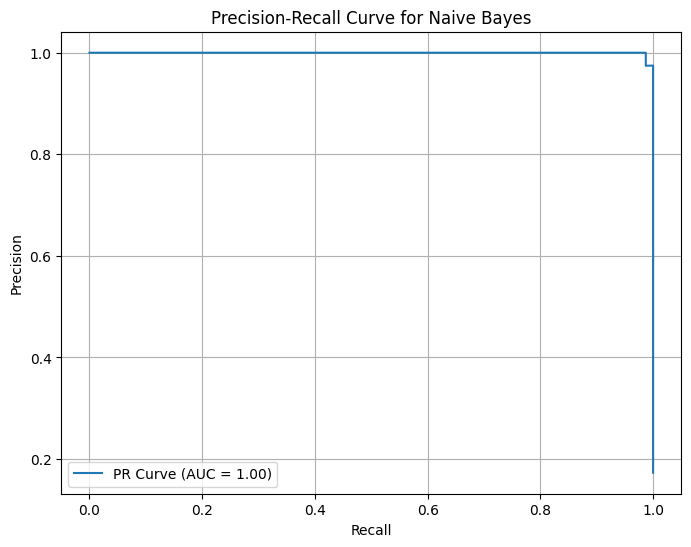

In [15]:
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train and predict using Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
nb_preds_proba = nb_model.predict_proba(X_test_tfidf)

# Evaluate performance
print("Naive Bayes Performance:")
accuracy = accuracy_score(y_test, nb_preds)
f1 = f1_score(y_test, nb_preds, average='weighted')
roc_auc = roc_auc_score(y_test, nb_preds_proba, multi_class='ovr')  # For multi-class classification
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_preds)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Naive Bayes Confusion Matrix.jpg")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, nb_preds_proba[:, 1], pos_label=1)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Naive Bayes")
plt.legend()
plt.grid()
plt.savefig("Naive Bayes PR Curve.jpg")
plt.show()

In [49]:
# Traditional Machine Learning Models
## Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

Naive Bayes Performance:
Accuracy: 0.9887640449438202
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       1.00      1.00      1.00        77
           2       0.99      0.99      0.99        84
           3       1.00      1.00      1.00       102
           4       0.96      0.99      0.98        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



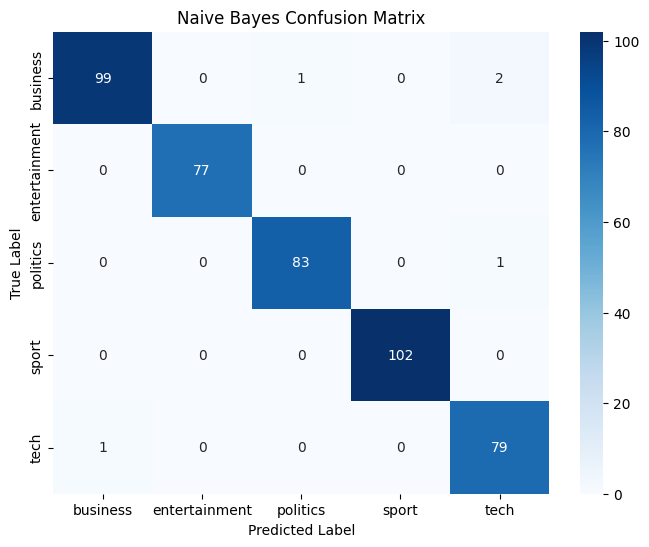

In [46]:
# Compute confusion matrix
cm = confusion_matrix(y_test, nb_preds)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Naive Bayes Confusion Matrix.jpg")
plt.show()

# Clustering Algorithm: KMeans (Not Selected)

In [37]:
## Clustering (KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_tfidf)
kmeans_preds = kmeans.predict(X_test_tfidf)

In [38]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_test_tfidf, kmeans_preds)
print("Silhouette Score for K-Means Clustering:", silhouette_avg)

Silhouette Score for K-Means Clustering: 0.013226472560786877


In [39]:
# Evaluate clustering using adjusted mutual information
from sklearn.metrics import adjusted_mutual_info_score
ami_score = adjusted_mutual_info_score(y_test, kmeans_preds)
print(f"KMeans AMI Score: {ami_score:.4f}")

KMeans AMI Score: 0.6667


In [40]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print(f"Variance explained by PCA: {pca.explained_variance_ratio_.sum():.4f}")

Variance explained by PCA: 0.0244


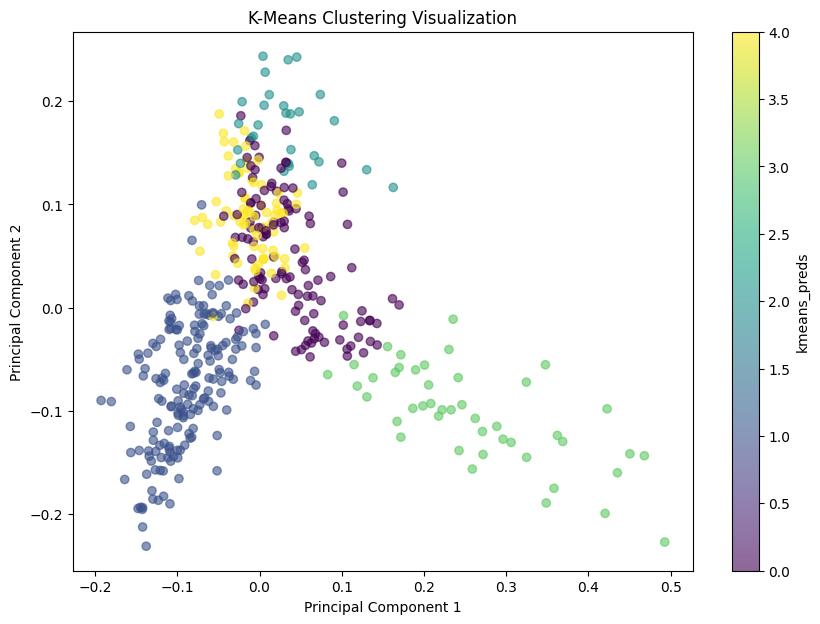

In [41]:
# Create a scatter plot for the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_preds, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="kmeans_preds")
plt.show()

# Logistic Regression (Not Selected)

C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Performance:
Accuracy: 0.950561797752809
F1 Score: 0.9504737439809929

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       102
           1       1.00      0.92      0.96        77
           2       0.96      0.88      0.92        84
           3       0.94      1.00      0.97       102
           4       0.99      0.95      0.97        80

    accuracy                           0.95       445
   macro avg       0.96      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



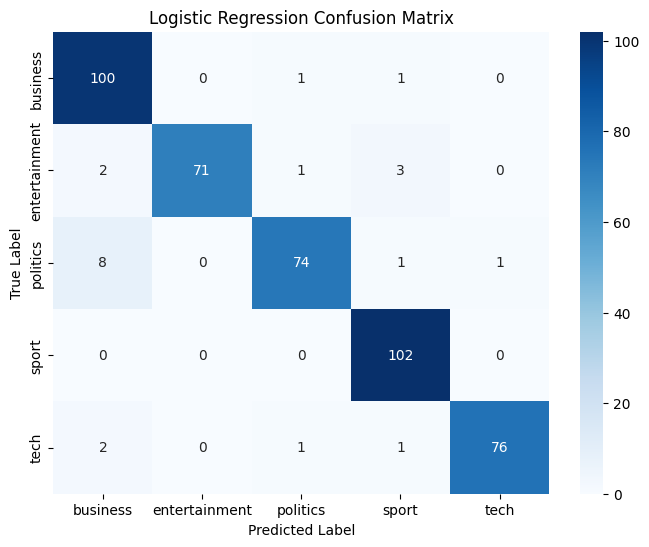

C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y

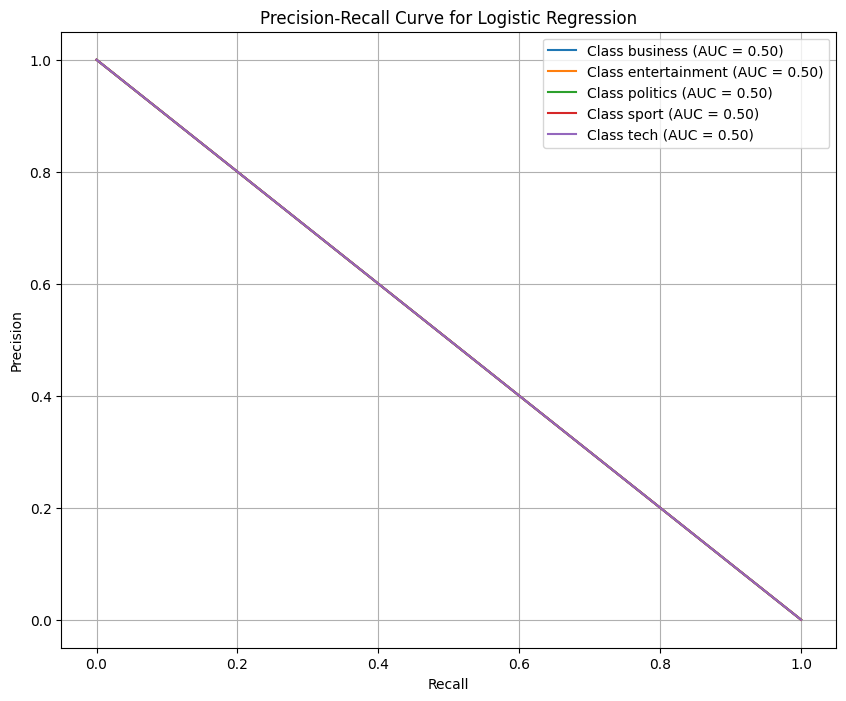

In [20]:
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Initialize and train Logistic Regression
lr_model = LogisticRegression(C=0.1, max_iter=1000, random_state=42, multi_class='ovr')
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)
y_proba_lr = lr_model.predict_proba(X_test_tfidf)  # Predicted probabilities for PR-AUC

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, average='weighted')  # Weighted F1 for multi-class
print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Logistic Regression Confusion Matrix.jpg")
plt.show()

# Precision-Recall Curve (OvR for multi-class)
plt.figure(figsize=(10, 8))
pr_auc = {}
for i, label in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test == label, y_proba_lr[:, i])
    pr_auc[label] = auc(recall, precision)
    plt.plot(recall, precision, label=f"Class {label} (AUC = {pr_auc[label]:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.savefig("Logistic Regression Precision-Recall Curve.jpg")
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr_model = LogisticRegression(C = 0.1, max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.9595505617977528

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       102
           1       1.00      0.97      0.99        77
           2       0.96      0.88      0.92        84
           3       0.97      1.00      0.99       102
           4       0.97      0.96      0.97        80

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



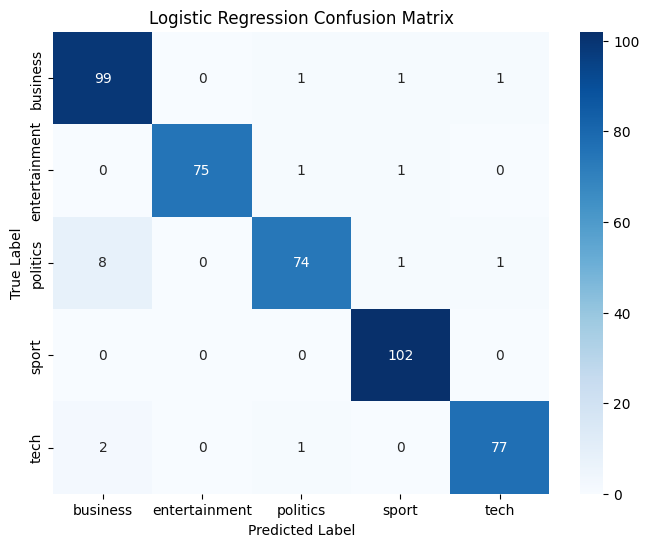

In [52]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Logistic Regression Confusion Matrix.jpg")
plt.show()

# Support Vector Machine

SVM Performance:
Accuracy: 0.9865168539325843
F1 Score: 0.9864819038766492

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.99      1.00      0.99        77
           2       0.98      0.99      0.98        84
           3       0.99      0.99      0.99       102
           4       0.98      1.00      0.99        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



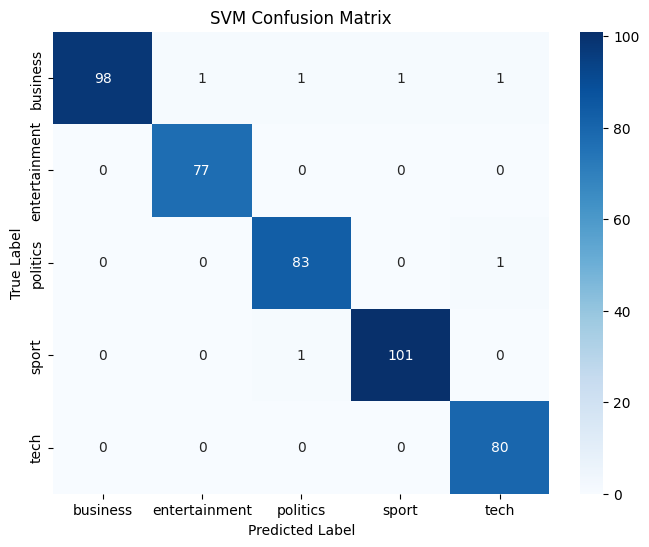

C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y

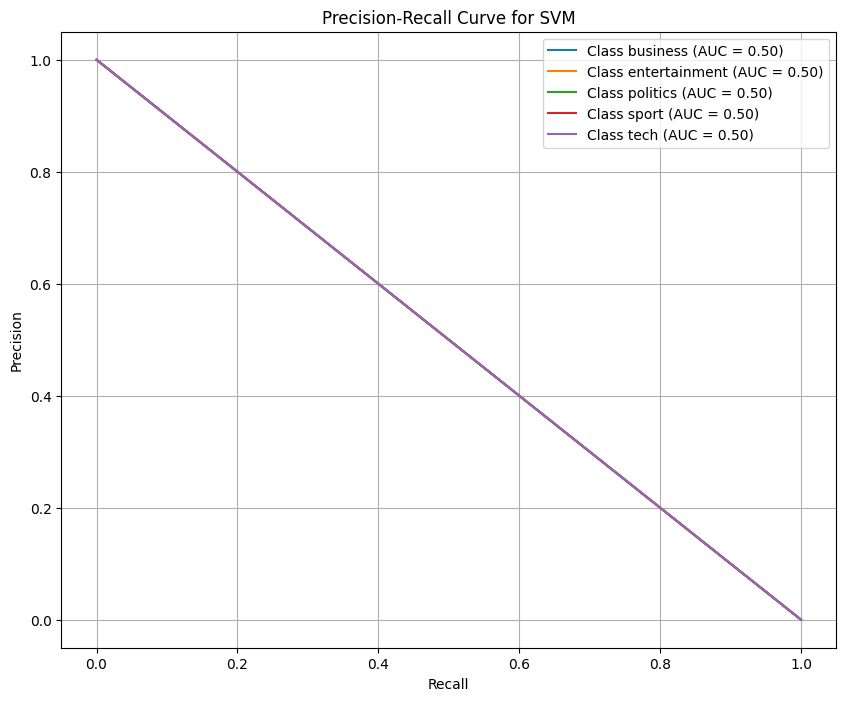

In [18]:
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train an SVM with a linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Enable probability=True for PR-AUC
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)
y_proba_svm = svm_model.predict_proba(X_test_tfidf)  # Predicted probabilities for PR-AUC

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')  # Weighted F1 for multi-class
print("SVM Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("SVM Confusion Matrix.jpg")
plt.show()

# Precision-Recall Curve (OvR for multi-class)
plt.figure(figsize=(10, 8))
pr_auc = {}
for i, label in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test == label, y_proba_svm[:, i])
    pr_auc[label] = auc(recall, precision)
    plt.plot(recall, precision, label=f"Class {label} (AUC = {pr_auc[label]:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM")
plt.legend()
plt.grid()
plt.savefig("SVM Precision-Recall Curve.jpg")
plt.show()

In [47]:
from sklearn.svm import SVC

# Initialize and train an SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.9865168539325843

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.99      1.00      0.99        77
           2       0.98      0.99      0.98        84
           3       0.99      0.99      0.99       102
           4       0.98      1.00      0.99        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



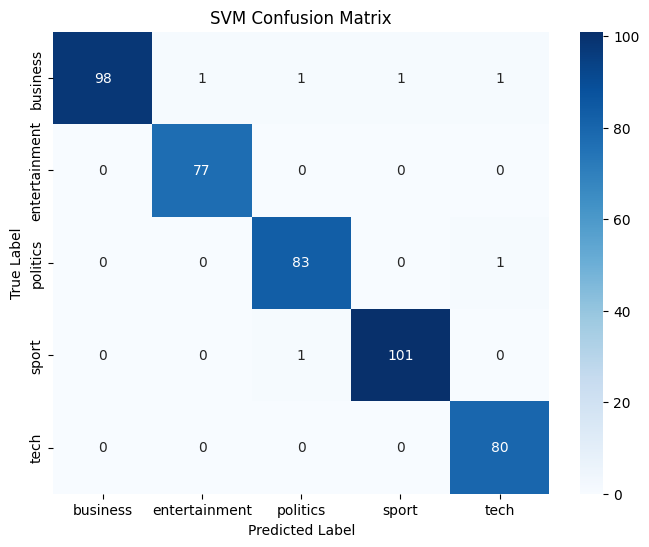

In [48]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("SVM Confusion Matrix.jpg")
plt.show()

# HyperParameter Tuning

# Logistic Regression Hyperparameters selection

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}

# Grid Search for Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, solver='lbfgs'),  # Explicitly specify solver and random state
    param_grid_lr,
    cv=5,
    verbose=1  # Optional: shows progress during search
)
grid_lr.fit(X_train_tfidf, y_train)

# Best parameters and accuracy
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 100}
Best Logistic Regression Accuracy: 0.9769662921348315


In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr_model = LogisticRegression(C = 100, max_iter=100, random_state=42, solver='lbfgs')
lr_model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.9910112359550561

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       1.00      1.00      1.00        77
           2       0.99      0.99      0.99        84
           3       0.99      1.00      1.00       102
           4       0.98      1.00      0.99        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



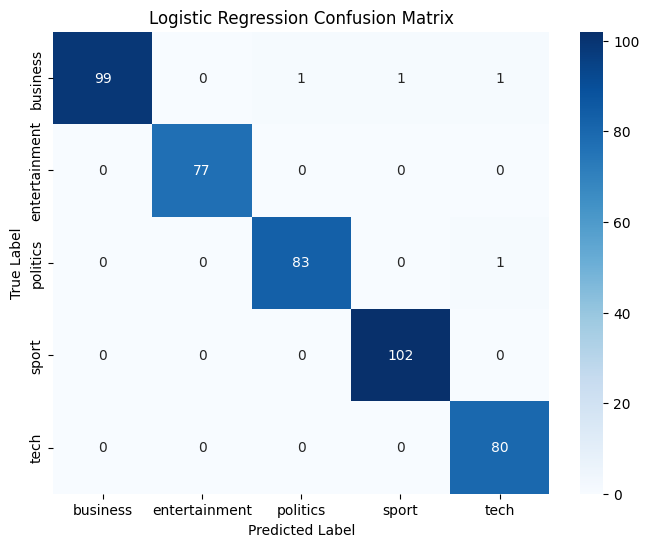

In [56]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Logistic Regression Confusion Matrix.jpg")
plt.show()

# Support Vector Machine Hyperparameters Selection

In [57]:
# Parameter grid for tuning SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Linear and RBF kernels
    'gamma': ['scale', 'auto']     # Kernel coefficient
}

# Grid Search for SVM
grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    verbose=1  # Optional: shows progress during search
)
grid_svm.fit(X_train_tfidf, y_train)

# Best parameters and accuracy
print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best SVM Accuracy:", grid_svm.best_score_)

# Evaluate the best model on the test set
best_svm_model = grid_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_tfidf)

print("\nBest SVM Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_svm))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.9786516853932584

Best SVM Performance on Test Set:
Accuracy: 0.9865168539325843

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.99      1.00      0.99        77
           2       0.98      0.99      0.98        84
           3       0.99      0.99      0.99       102
           4       0.98      1.00      0.99        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



# Data Preprocessing for Deep Learning

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define tokenizer parameters
max_words = 10000  # Maximum vocabulary size
max_len = 100  # Maximum sequence length

# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Check shape of the data
print("Training data shape (Deep Learning):", X_train_pad.shape)
print("Testing data shape (Deep Learning):", X_test_pad.shape)

Training data shape (Deep Learning): (1780, 100)
Testing data shape (Deep Learning): (445, 100)


### LSTM with dropout 0.5, batch size 32, and epochs 20

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

max_words = 10000
max_len = 100

# LSTM-based model with regularization
lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    validation_data=(X_test_pad, y_test)
)




C:\Users\sleek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.2546 - loss: 2.2574 - val_accuracy: 0.3888 - val_loss: 1.6791
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.3830 - loss: 1.6438 - val_accuracy: 0.3753 - val_loss: 1.5446
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.4209 - loss: 1.4885 - val_accuracy: 0.4292 - val_loss: 1.4859
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.4275 - loss: 1.4946 - val_accuracy: 0.4494 - val_loss: 1.2516
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.4679 - loss: 1.2731 - val_accuracy: 0.4562 - val_loss: 1.0763
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.5537 - loss: 1.0934 - val_accuracy: 0.6966 - val_loss: 0.8375
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.6951 - loss: 0.8614 - val_accuracy: 0.7506 - val_loss: 0.6824
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8158 - loss: 0.6771 - val_accuracy: 0

In [60]:
# Evaluate the model on test data
test_loss, test_accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=2)
print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 1s - 46ms/step - accuracy: 0.9551 - loss: 0.2343
LSTM Test Accuracy: 95.51%


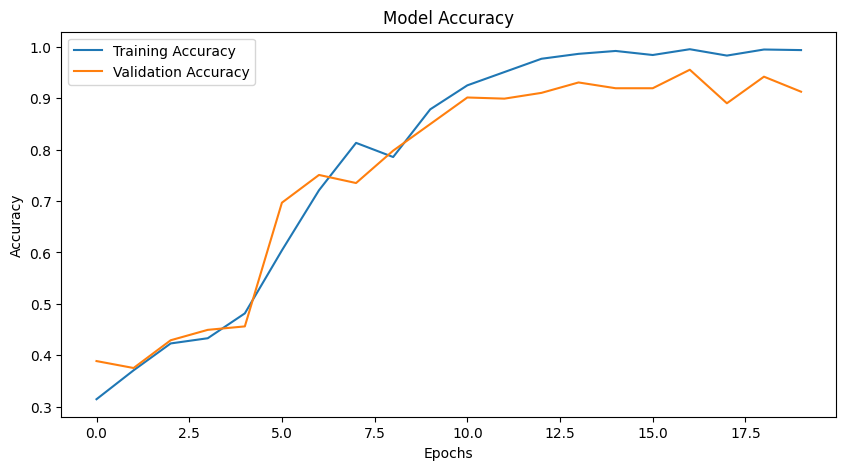

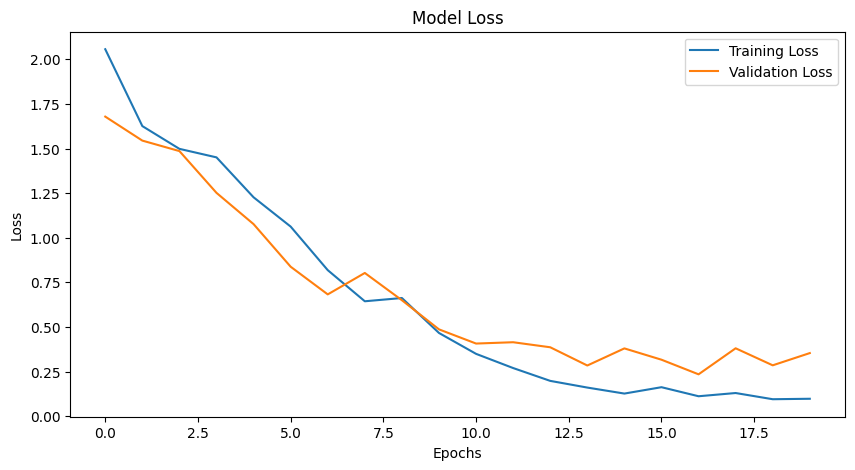

In [61]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM with dropout 0.3, batch size 64, and epochs 20

In [64]:
max_words = 10000
max_len = 100

# LSTM-based model with regularization
lstm_model_1 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

lstm_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history_1 = lstm_model_1.fit(
    X_train_pad, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=64,
    callbacks=[early_stopping],
    validation_data=(X_test_pad, y_test)
)




Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.2364 - loss: 2.3410 - val_accuracy: 0.4584 - val_loss: 1.7764
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.4287 - loss: 1.7134 - val_accuracy: 0.4539 - val_loss: 1.5554
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.4290 - loss: 1.5004 - val_accuracy: 0.4360 - val_loss: 1.3897
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.4468 - loss: 1.3615 - val_accuracy: 0.4517 - val_loss: 1.2856
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.5142 - loss: 1.2303 - val_accuracy: 0.7236 - val_loss: 1.0283
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.6991 - loss: 0.9684 - val_accuracy: 0.8112 - val_loss: 0.5684
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - accuracy: 0.8023 - loss: 0.7455 - val_accuracy: 0.8787 - val_loss: 0.5029
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.8840 - loss: 0.5284 - val_accuracy: 

In [67]:
# Evaluate the model on test data
test_loss, test_accuracy = lstm_model_1.evaluate(X_test_pad, y_test, verbose=2)
print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 1s - 45ms/step - accuracy: 0.9303 - loss: 0.3226
LSTM Test Accuracy: 93.03%


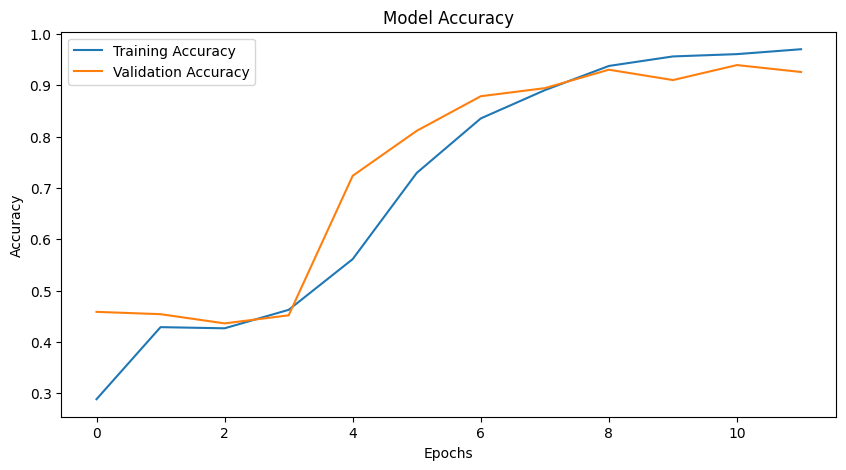

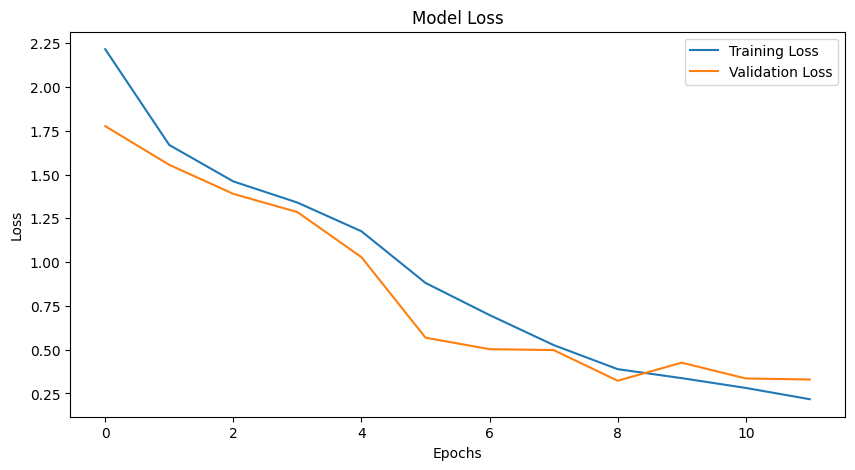

In [65]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM with dropout 0.5, batch size 128, and epochs 20

In [66]:
max_words = 10000
max_len = 100

# LSTM-based model with regularization
lstm_model_2 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

lstm_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history_2 = lstm_model_2.fit(
    X_train_pad, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=128,
    callbacks=[early_stopping],
    validation_data=(X_test_pad, y_test)
)




Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 0.2323 - loss: 2.4151 - val_accuracy: 0.3506 - val_loss: 2.2568
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.3301 - loss: 2.1624 - val_accuracy: 0.4494 - val_loss: 1.7665
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.4465 - loss: 1.8540 - val_accuracy: 0.4427 - val_loss: 1.7171
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.4111 - loss: 1.7782 - val_accuracy: 0.4562 - val_loss: 1.6297
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.4347 - loss: 1.6428 - val_accuracy: 0.4539 - val_loss: 1.4866
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.4577 - loss: 1.4934 - val_accuracy: 0.4517 - val_loss: 1.4499
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.4567 - loss: 1.4290 - val_accuracy: 0.4517 - val_loss: 1.3830
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.4710 - loss: 1.3780 - val_accuracy: 0

In [68]:
# Evaluate the model on test data
test_loss, test_accuracy = lstm_model_2.evaluate(X_test_pad, y_test, verbose=2)
print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 1s - 44ms/step - accuracy: 0.9079 - loss: 0.4618
LSTM Test Accuracy: 90.79%


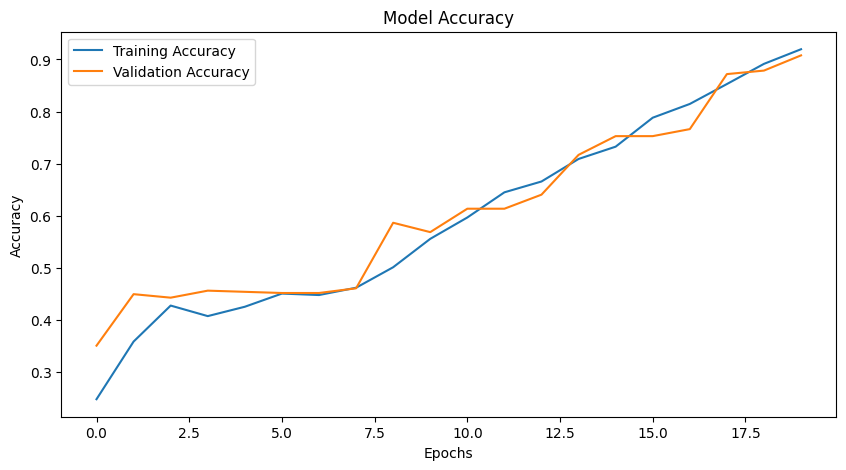

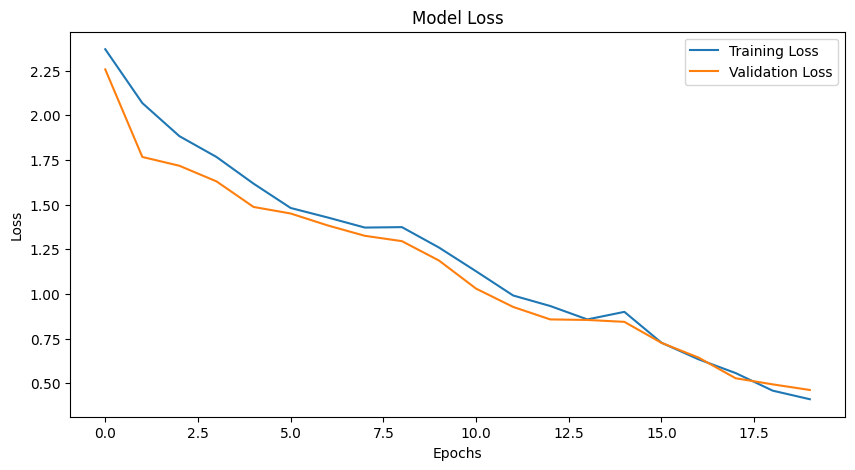

In [69]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM with dropout 0.5, batch size 32, and epochs 30

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

max_words = 10000
max_len = 100

# LSTM-based model with regularization
lstm_model_3 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

lstm_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history_3 = lstm_model_3.fit(
    X_train_pad, y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    validation_data=(X_test_pad, y_test)
)




Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.2554 - loss: 2.2746 - val_accuracy: 0.4674 - val_loss: 1.5971
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.3958 - loss: 1.6727 - val_accuracy: 0.3978 - val_loss: 1.5151
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.4193 - loss: 1.5684 - val_accuracy: 0.4382 - val_loss: 1.4473
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.4301 - loss: 1.4697 - val_accuracy: 0.4494 - val_loss: 1.2164
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.5442 - loss: 1.1625 - val_accuracy: 0.5933 - val_loss: 1.1197
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.6881 - loss: 0.9332 - val_accuracy: 0.7753 - val_loss: 0.6029
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.8003 - loss: 0.6148 - val_accuracy: 0.8202 - val_loss: 0.5421
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.8912 - loss: 0.4959 - val_accuracy: 

In [71]:
# Evaluate the model on test data
test_loss, test_accuracy = lstm_model_3.evaluate(X_test_pad, y_test, verbose=2)
print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 1s - 44ms/step - accuracy: 0.9461 - loss: 0.2626
LSTM Test Accuracy: 94.61%


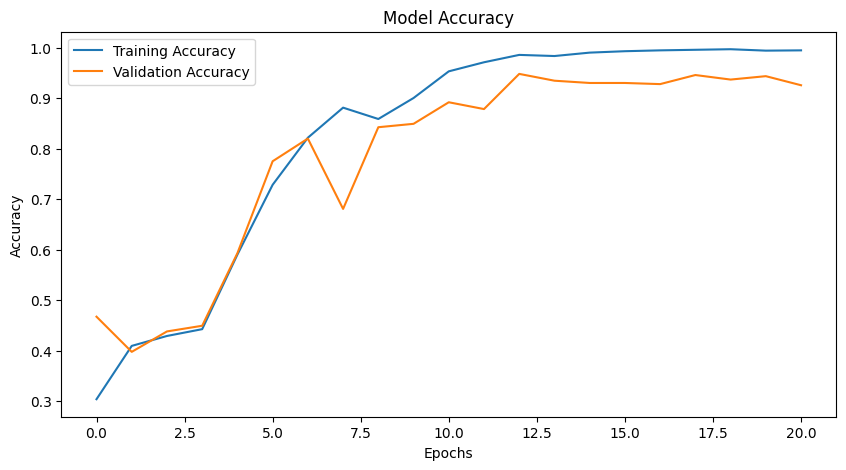

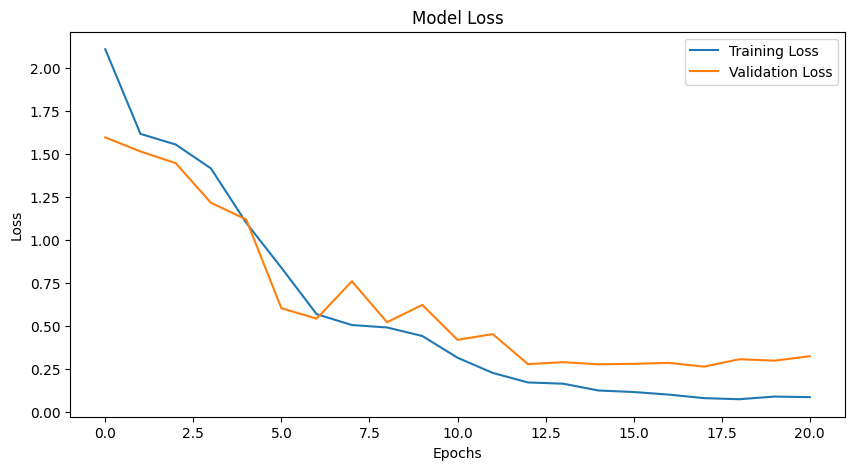

In [72]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gated Recurrent Unit

In [44]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    GRU(64, return_sequences=False),  # GRU with 64 units
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Binary classification
])

# Compile the model
gru_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
# Train the model
gru_history = gru_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    batch_size=32,
    epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4635 - loss: 1.3604 - val_accuracy: 0.6202 - val_loss: 0.9848
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6811 - loss: 0.7704 - val_accuracy: 0.6966 - val_loss: 0.6561
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7943 - loss: 0.4864 - val_accuracy: 0.7910 - val_loss: 0.5765
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9282 - loss: 0.2522 - val_accuracy: 0.8292 - val_loss: 0.5412
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9757 - loss: 0.1011 - val_accuracy: 0.8629 - val_loss: 0.4996
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9924 - loss: 0.0430 - val_accuracy: 0.8652 - val_loss: 0.4468
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9953 - loss: 0.0275 - val_accuracy: 0.8764 - val_loss: 0.4227
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9974 - loss: 0.0105 - val_accuracy: 0.8427 - v

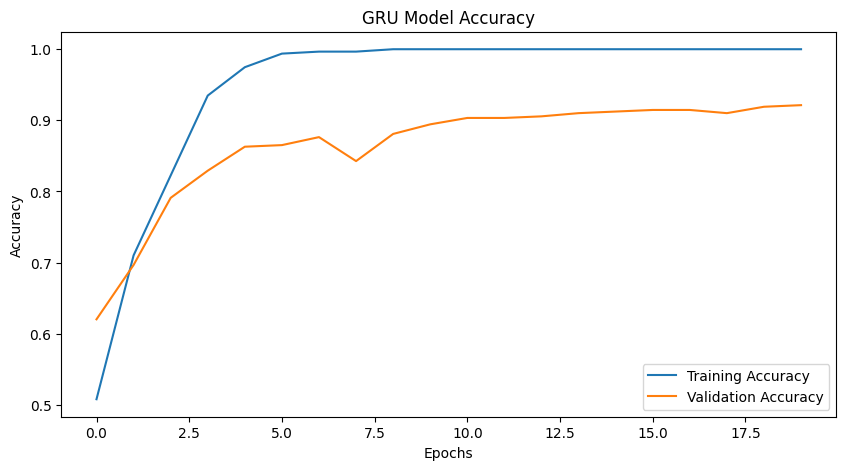

In [48]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CNN Architecture

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

# Parameters
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum length of sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Build the CNN model
cnn_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),  # Embedding layer
    Conv1D(64, 5, activation='relu'),                # Convolutional layer with 64 filters, kernel size = 5
    GlobalMaxPooling1D(),                            # Global max pooling
    Dense(64, activation='relu'),                    # Fully connected layer
    Dropout(0.5),                                    # Dropout for regularization
    Dense(5, activation='softmax')                   # Output layer for multi-class classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_seq, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the CNN model
cnn_preds = cnn_model.predict(X_test_seq)
cnn_preds_classes = cnn_preds.argmax(axis=1)

# Print evaluation metrics
print("CNN Classification Report:")
print(classification_report(y_test, cnn_preds_classes))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2498 - loss: 1.6020 - val_accuracy: 0.4213 - val_loss: 1.5416
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5409 - loss: 1.4395 - val_accuracy: 0.6124 - val_loss: 1.2240
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7582 - loss: 0.9495 - val_accuracy: 0.8202 - val_loss: 0.6356
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9142 - loss: 0.4047 - val_accuracy: 0.9073 - val_loss: 0.3431
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9859 - loss: 0.1374 - val_accuracy: 0.9157 - val_loss: 0.2639
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9919 - loss: 0.0768 - val_accuracy: 0.9157 - val_loss: 0.2301
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9954 - loss: 0.0462 - val_accuracy: 0.9157 - val_loss: 0.2207
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9990 - loss: 0.0286 - val_accuracy: 0.9213 - v

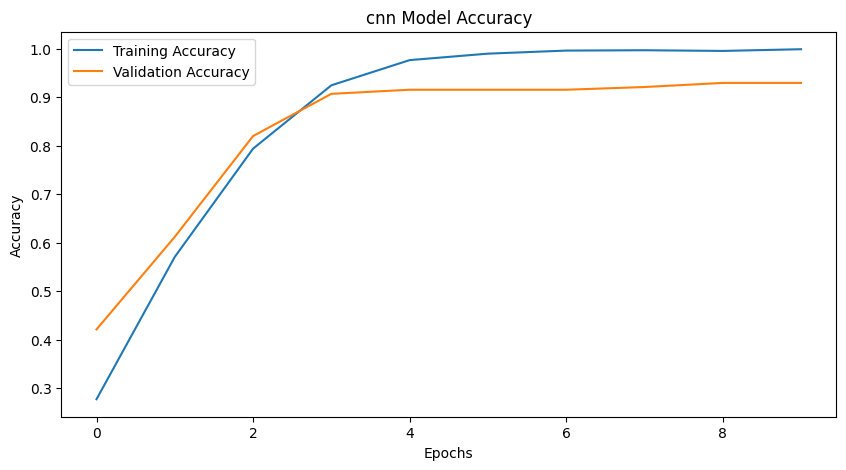

In [52]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('cnn Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()